# ENPM809K: Final Project | Group 18

# Electricity consumption forecasting using Recurrent Neural Networks

In [ ]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

# TODO: Enter the foldername in your Drive where you have saved the unzipped
# assignment folder, e.g. 'cs231n/assignments/assignment3/'
FOLDERNAME = 'enpm809k/project'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
%matplotlib inline


In [ ]:
!pwd

/content


#Data Preprocessing

In [ ]:
df =pd.read_csv("/content/drive/MyDrive/enpm809k/project/AEP_hourly.csv")


df.head()

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


In [ ]:
# Information about Dataset
print(df.info())

# Describing the dataset
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  121273 non-null  object 
 1   AEP_MW    121273 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.9+ MB
None
              AEP_MW
count  121273.000000
mean    15499.513717
std      2591.399065
min      9581.000000
25%     13630.000000
50%     15310.000000
75%     17200.000000
max     25695.000000


In [ ]:
df.loc[~df.index.duplicated(), :]

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0
...,...,...
121268,2018-01-01 20:00:00,21089.0
121269,2018-01-01 21:00:00,20999.0
121270,2018-01-01 22:00:00,20820.0
121271,2018-01-01 23:00:00,20415.0


In [ ]:
df1 = df
df1["Month"] = pd.to_datetime(df["Datetime"]).dt.month
df1["Year"] = pd.to_datetime(df["Datetime"]).dt.year
df1["Date"] = pd.to_datetime(df["Datetime"]).dt.date
df1["Time"] = pd.to_datetime(df["Datetime"]).dt.time
df1["Week"] = pd.to_datetime(df["Datetime"]).dt.week
df1["Day"] = pd.to_datetime(df["Datetime"]).dt.day_name()
df1 = df.set_index("Datetime")
df1.index = pd.to_datetime(df1.index)
df1.head()

<ipython-input-12-970f53d658d4>:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df1["Week"] = pd.to_datetime(df["Datetime"]).dt.week


,AEP_MW,Month,Year,Date,Time,Week,Day
Datetime,,,,,,,
2004-12-31 01:00:00,13478.0,12,2004,2004-12-31,01:00:00,53,Friday
2004-12-31 02:00:00,12865.0,12,2004,2004-12-31,02:00:00,53,Friday
2004-12-31 03:00:00,12577.0,12,2004,2004-12-31,03:00:00,53,Friday
2004-12-31 04:00:00,12517.0,12,2004,2004-12-31,04:00:00,53,Friday
2004-12-31 05:00:00,12670.0,12,2004,2004-12-31,05:00:00,53,Friday


In [ ]:
# unique Years
print(df.Year.unique(),"\n")
print("Different Years : ",df.Year.nunique())

[2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018] 

Unique Years :  15


# Exploratory Data Analysis

Text(0.5, 1.0, 'Energy Consumption According to Year')

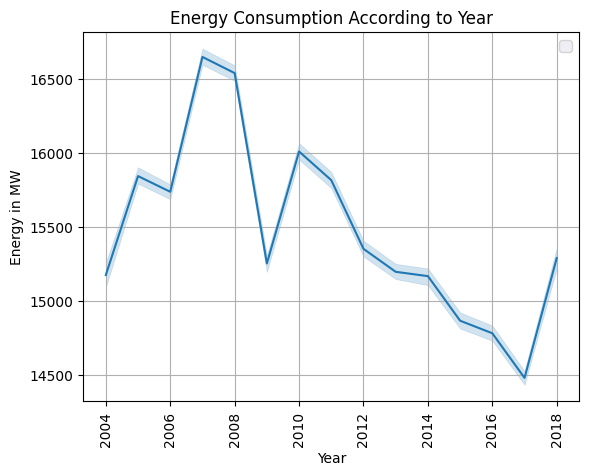

In [ ]:
from matplotlib import style

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

style.use('ggplot')

sns.lineplot(x="Year", y="AEP_MW", data=df)
sns.set(rc={'figure.figsize':(15,6)})

plt.xlabel("Year")
plt.ylabel("Energy in MW")
plt.grid(True)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)


plt.title("Yearly energy consumption trend")

<ipython-input-15-47b4b06352c8>:13: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  y_2004 = df1["2004"]["AEP_MW"].to_list()
<ipython-input-15-47b4b06352c8>:14: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  x_2004 = df1["2004"]["Date"].to_list()
<ipython-input-15-47b4b06352c8>:18: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  y_2005 = df1["2005"]["AEP_MW"].to_list()
<ipython-input-15-47b4b06352c8>:19: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to sli

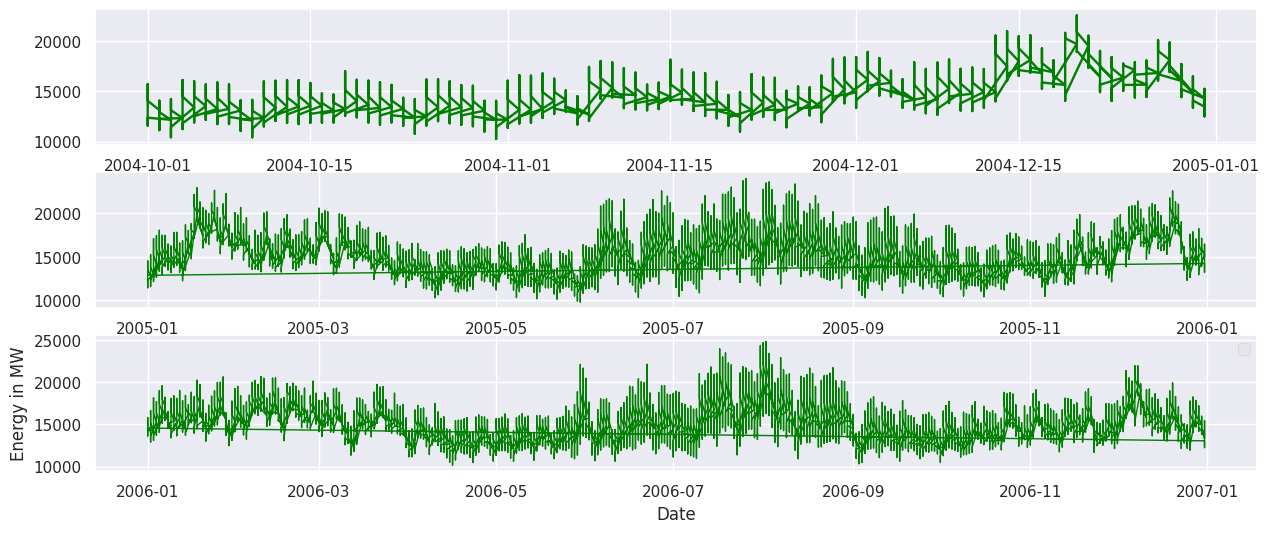

In [ ]:
from matplotlib import style


fig = plt.figure()

ax1= fig.add_subplot(311)
ax2= fig.add_subplot(312)
ax3= fig.add_subplot(313)

style.use('ggplot')

y_2004 = df1["2004"]["AEP_MW"].to_list()
x_2004 = df1["2004"]["Date"].to_list()
ax1.plot(x_2004,y_2004, color="blue")


y_2005 = df1["2005"]["AEP_MW"].to_list()
x_2005 = df1["2005"]["Date"].to_list()
ax2.plot(x_2005, y_2005, color="blue")


y_2006 = df1["2006"]["AEP_MW"].to_list()
x_2006 = df1["2006"]["Date"].to_list()
ax3.plot(x_2006, y_2006, color="blue")


plt.rcParams["figure.figsize"] = (18,8)

plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True, alpha=1)
plt.legend()
#plt.title("Energy consumption")

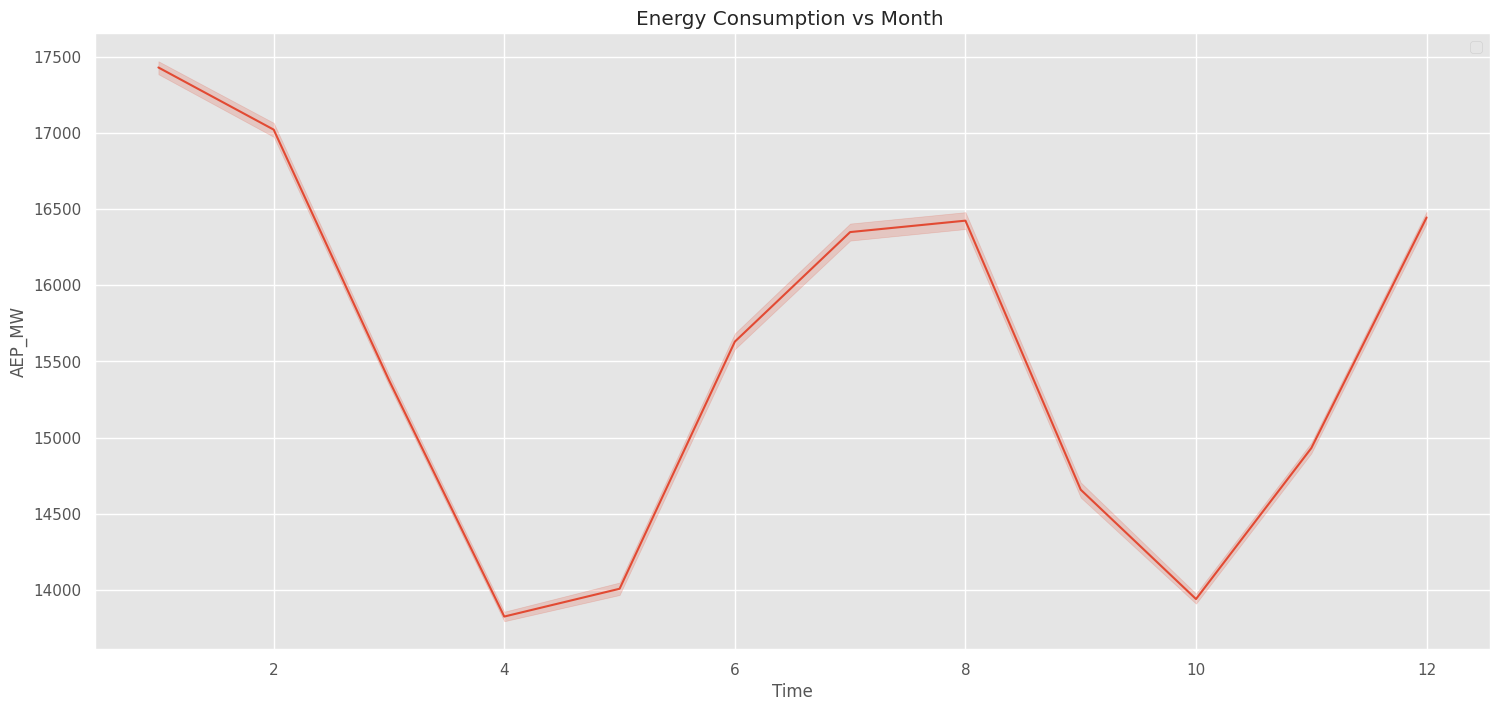

In [ ]:
fig = plt.figure()
ax1= fig.add_subplot(111)

sns.lineplot(x=df["Month"],y=df["AEP_MW"], data=df)
plt.title("Monthly energy consumption trend ")

plt.xlabel("Time")
plt.grid(True, alpha=1)
plt.legend()


In [ ]:
NewDataset = df1.resample('D').mean()

print("old dataset",df1.shape)
print("new dataset",NewDataset.shape)

NewDataset

old dataset (121273, 7)
new dataset (5055, 4)


<ipython-input-17-5c2a533743c5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  NewDataset = df1.resample('D').mean()


,AEP_MW,Month,Year,Week
Datetime,,,,
2004-10-01,14284.521739,10.0,2004.0,40.0
2004-10-02,12999.875000,10.0,2004.0,40.0
2004-10-03,12227.083333,10.0,2004.0,40.0
2004-10-04,14309.041667,10.0,2004.0,41.0
2004-10-05,14439.708333,10.0,2004.0,41.0
...,...,...,...,...
2018-07-30,15368.083333,7.0,2018.0,31.0
2018-07-31,15180.291667,7.0,2018.0,31.0
2018-08-01,15151.166667,8.0,2018.0,31.0


# Train / Test Data Split

In [ ]:
TestData = NewDataset.tail(100)
TestData

Training_Set = NewDataset.iloc[:,0:1]
Training_Set = Training_Set[:-60]
Training_Set

Validation_Set = Training_Set[-495:]
Training_Set = Training_Set[:-495]

print("Training Set Shape ", Training_Set.shape)
print("Validation Set Shape ", Validation_Set.shape)
print("Test Set Shape ", TestData.shape)

Training Set Shape  (4500, 1)
Validation Set Shape  (495, 1)
Test Set Shape  (100, 4)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

#Training_Set = Training_Set.values
sc = MinMaxScaler(feature_range = (0,1))
Validation = sc.fit_transform(Validation_Set)
Train = sc.fit_transform(Training_Set)


In [ ]:
X_Valid = []
Y_Valid = []

for i in range(60, Validation.shape[0]):
    X_Valid.append(Validation[i-60:i])
    Y_Valid.append(Validation[i])

X_Valid = np.array(X_Valid)
Y_Valid = np.array(Y_Valid)

# Reshape X_Valid for compatibility with the model
X_Valid = np.reshape(X_Valid, newshape=(X_Valid.shape[0], X_Valid.shape[1], 1))
print(X_Valid.shape)
print(Y_Valid.shape)


(435, 60, 1)
(435, 1)


In [ ]:
X_Train = []
Y_Train = []

# Range should be fromm 60 Values to END
for i in range(60, Train.shape[0]):

    # X_Train 0-59
    X_Train.append(Train[i-60:i])

    # Y Would be 60 th Value based on past 60 Values
    Y_Train.append(Train[i])

# Convert into Numpy Array
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)

print(X_Train.shape)
print(Y_Train.shape)

(4440, 60, 1)
(4440, 1)


In [ ]:
X_Train = np.reshape(X_Train, newshape=(X_Train.shape[0], X_Train.shape[1], 1))
X_Train.shape

(4440, 60, 1)

# 1. 1-D CNN Model Architecture

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv1D, MaxPooling1D, Flatten
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import ParameterGrid
import numpy as np

# Define your model function
def create_model(filters=64, kernel_size=3, pool_size=2, dropout_rate=0.2):
    model = Sequential()
    model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=(X_Train.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Dropout(dropout_rate))
    model.add(Flatten())
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Define the hyperparameters to tune
param_grid = {
    'filters': [32, 64],
    'dropout_rate': [0.001, 0.005, 0.01],
}

best_score = np.inf
best_params = None
best_model = None

# Loop through hyperparameter combinations
for params in ParameterGrid(param_grid):
    model = create_model(**params)
    model.fit(X_Train, Y_Train, epochs=10, batch_size=32, verbose=0)

    # Evaluate the model on the validation set
    y_pred = model.predict(X_Valid)
    mse = mean_squared_error(Y_Valid, y_pred)

    # Update best parameters if the current model is better
    if mse < best_score:
        best_score = mse
        best_params = params
        best_model = model

best_score

14/14 [==============================] - 0s 2ms/step


0.006200030138228163

In [ ]:
model = best_model
best_params


{'dropout_rate': 0.001, 'filters': 64}

In [ ]:
model.fit(X_Train, Y_Train, epochs = 20, batch_size = 32)

Epoch 1/20
139/139 [==============================] - 1s 4ms/step - loss: 0.0051
Epoch 2/20
139/139 [==============================] - 1s 5ms/step - loss: 0.0049
Epoch 3/20
139/139 [==============================] - 1s 6ms/step - loss: 0.0047
Epoch 4/20
139/139 [==============================] - 1s 6ms/step - loss: 0.0046
Epoch 5/20
139/139 [==============================] - 1s 6ms/step - loss: 0.0046
Epoch 6/20
139/139 [==============================] - 1s 6ms/step - loss: 0.0045
Epoch 7/20
139/139 [==============================] - 1s 6ms/step - loss: 0.0045
Epoch 8/20
139/139 [==============================] - 1s 8ms/step - loss: 0.0045
Epoch 9/20
139/139 [==============================] - 1s 7ms/step - loss: 0.0044
Epoch 10/20
139/139 [==============================] - 1s 4ms/step - loss: 0.0044
Epoch 11/20
139/139 [==============================] - 1s 4ms/step - loss: 0.0043
Epoch 12/20
139/139 [==============================] - 1s 4ms/step - loss: 0.0043
Epoch 13/20
139/139 [====

Epoch 1/20
139/139 [==============================] - 0s 3ms/step - loss: 0.0050
Epoch 2/20
139/139 [==============================] - 0s 3ms/step - loss: 0.0049
Epoch 3/20
139/139 [==============================] - 0s 3ms/step - loss: 0.0048
Epoch 4/20
139/139 [==============================] - 0s 3ms/step - loss: 0.0047
Epoch 5/20
139/139 [==============================] - 0s 3ms/step - loss: 0.0046
Epoch 6/20
139/139 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 7/20
139/139 [==============================] - 0s 3ms/step - loss: 0.0048
Epoch 8/20
139/139 [==============================] - 0s 3ms/step - loss: 0.0044
Epoch 9/20
139/139 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 10/20
139/139 [==============================] - 0s 3ms/step - loss: 0.0043
Epoch 11/20
139/139 [==============================] - 0s 3ms/step - loss: 0.0043
Epoch 12/20
139/139 [==============================] - 0s 3ms/step - loss: 0.0044
Epoch 13/20
139/139 [====

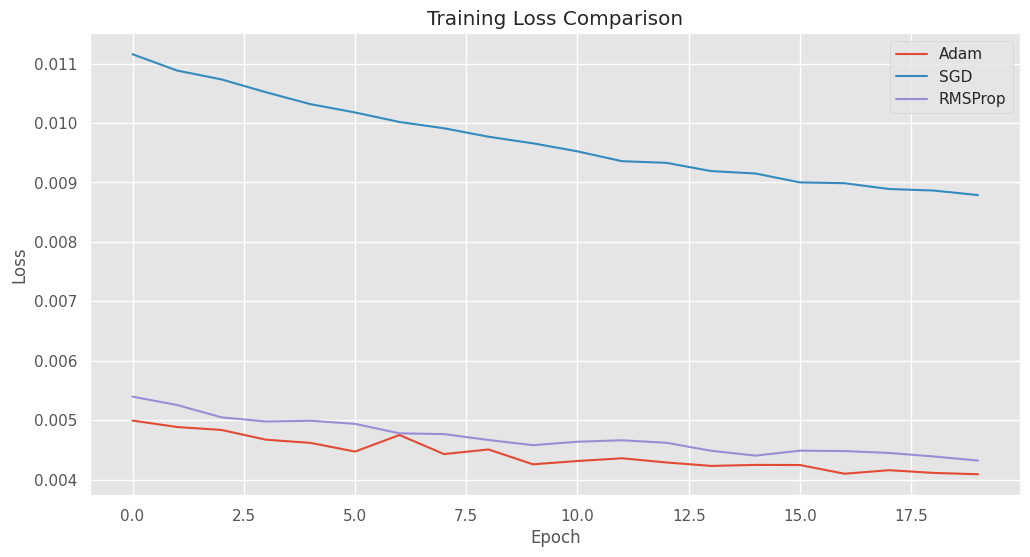

In [ ]:
history = model.fit(X_Train, Y_Train, epochs=20, batch_size=32, verbose=1)
history1 = model1.fit(X_Train, Y_Train, epochs=20, batch_size=32, verbose=1)
history2 = model2.fit(X_Train, Y_Train, epochs=20, batch_size=32, verbose=1)

plt.figure(figsize=(12, 6))

plt.plot(history.history['loss'], label='Adam')
plt.title('Training Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.plot(history1.history['loss'], label='SGD')

plt.plot(history2.history['loss'], label='RMSProp')

plt.legend()
plt.show()

In [ ]:
TestData.head()

TestData.shape

NewDataset.shape

(5055, 4)

In [ ]:
Df_Total = pd.concat((NewDataset[["AEP_MW"]], TestData[["AEP_MW"]]), axis=0)

Df_Total.shape

(5155, 1)

In [ ]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values
inputs.shape

(160, 1)

In [ ]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values

# We need to Reshape
inputs = inputs.reshape(-1,1)

# Normalize the Dataset
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 160):
    X_test.append(inputs[i-60:i])

# Convert into Numpy Array
X_test = np.array(X_test)

# Reshape before Passing to Network
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Pass to Model
predicted_stock_price = model.predict(X_test)

# Do inverse Transformation to get Values
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

4/4 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
True_MegaWatt = TestData["AEP_MW"].to_list()
Predicted_MegaWatt  = predicted_stock_price
dates = TestData.index.to_list()

In [ ]:
Machine_Df = pd.DataFrame(data={
    "Date":dates,
    "TrueMegaWatt": True_MegaWatt,
    "PredictedMeagWatt":[x[0] for x in Predicted_MegaWatt ]
})

Machine_Df

,Date,TrueMegaWatt,PredictedMeagWatt
0,2018-04-26,13157.791667,14022.887695
1,2018-04-27,12964.000000,12987.507812
2,2018-04-28,12237.583333,14712.132812
3,2018-04-29,12156.791667,13248.240234
4,2018-04-30,13443.500000,12557.417969
...,...,...,...
95,2018-07-30,15368.083333,15225.806641
96,2018-07-31,15180.291667,15604.766602
97,2018-08-01,15151.166667,15474.073242
98,2018-08-02,15687.666667,15599.863281


In [ ]:
True_MegaWatt = TestData["AEP_MW"].to_list()
Predicted_MegaWatt  = [x[0] for x in Predicted_MegaWatt ]
dates = TestData.index.to_list()

In [ ]:
fig = plt.figure()

ax1= fig.add_subplot(111)

x = dates
y = True_MegaWatt

y1 = Predicted_MegaWatt

plt.plot(x,y, color="green")
plt.plot(x,y1, color="red")
# beautify the x-labels
plt.gcf().autofmt_xdate()
plt.xlabel('Dates')
plt.ylabel("Power in MW")
plt.title("Machine Learned the Pattern Predicting Future Values ")
plt.legend()

# 2. Simple RNN Model Architecture

RNN ------------------------

In [ ]:

# importing libraries

from keras.models import Sequential

from keras.layers import LSTM

from keras.layers import Dense

from keras.layers import SimpleRNN

from keras.layers import Dropout

from keras.layers import GRU, Bidirectional

from keras.optimizers import SGD

from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_train = scaler.fit_transform(Training_Set)

from sklearn.metrics import mean_squared_error
regressor = Sequential()

In [ ]:

# initializing the RNN

regressor = Sequential()

# adding RNN layers and dropout regularization

regressor.add(SimpleRNN(units = 50,

                        activation = "tanh",

                        return_sequences = True,

                        input_shape = (X_Train.shape[1],1)))

regressor.add(Dropout(0.2))


regressor.add(SimpleRNN(units = 50,

                        activation = "tanh",

                        return_sequences = True))


regressor.add(SimpleRNN(units = 50,

                        activation = "tanh",

                        return_sequences = True))


regressor.add( SimpleRNN(units = 50))

# adding the output layer

regressor.add(Dense(units = 1,activation='sigmoid'))

# compiling RNN

regressor.compile(optimizer = SGD(learning_rate=0.01,

                                  momentum=0.9,

                                  nesterov=True),

                  loss = "mean_squared_error")

# fitting the model

regressor.fit(X_Train, Y_Train, epochs = 20, batch_size = 2)
regressor.summary()


Epoch 1/20
2220/2220 [==============================] - 104s 45ms/step - loss: 0.0122
Epoch 2/20
2220/2220 [==============================] - 90s 40ms/step - loss: 0.0064
Epoch 3/20
2220/2220 [==============================] - 91s 41ms/step - loss: 0.0055
Epoch 4/20
2220/2220 [==============================] - 89s 40ms/step - loss: 0.0053
Epoch 5/20
2220/2220 [==============================] - 90s 40ms/step - loss: 0.0051
Epoch 6/20
2220/2220 [==============================] - 91s 41ms/step - loss: 0.0048
Epoch 7/20
2220/2220 [==============================] - 89s 40ms/step - loss: 0.0048
Epoch 8/20
2220/2220 [==============================] - 91s 41ms/step - loss: 0.0046
Epoch 9/20
2220/2220 [==============================] - 91s 41ms/step - loss: 0.0045
Epoch 10/20
2220/2220 [==============================] - 90s 40ms/step - loss: 0.0044
Epoch 11/20
2220/2220 [==============================] - 94s 42ms/step - loss: 0.0042
Epoch 12/20
2220/2220 [==============================] - 90s 4

In [ ]:
from keras.layers import Dense, Activation, Dropout
from keras.layers import SimpleRNN
from keras.models import Sequential
base_model = Sequential()

S_RNN_with_sgd = Sequential()

# Adding the first LSTM layer
S_RNN_with_sgd.add(SimpleRNN(units = 50, return_sequences = True, input_shape = (X_Train.shape[1], 1)))

# Adding a second LSTM layer
S_RNN_with_sgd.add(SimpleRNN(units = 50, return_sequences = True))

# Adding a third LSTM layer
S_RNN_with_sgd.add(SimpleRNN(units = 50, return_sequences = True))

# Adding a fourth LSTM layer
S_RNN_with_sgd.add(SimpleRNN(units = 50))

# Adding the output layer
S_RNN_with_sgd.add(Dense(units = 1))

# Compiling the RNN with "Adam" as an optimizer
S_RNN_with_sgd.compile(optimizer = 'adam', loss = 'mean_squared_error')

S_RNN_with_sgd.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 60, 50)            2600      
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 60, 50)            5050      
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 60, 50)            5050      
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 50)                5050      
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                                 
Total params: 17801 (69.54 KB)
Trainable params: 17801 (69.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
S_RNN_with_adam = Sequential()

# Adding the first LSTM layer
S_RNN_with_adam.add(SimpleRNN(units = 50, return_sequences = True, input_shape = (X_Train.shape[1], 1)))

# Adding a second LSTM layer
S_RNN_with_adam.add(SimpleRNN(units = 50, return_sequences = True))

# Adding a third LSTM layer
S_RNN_with_adam.add(SimpleRNN(units = 50, return_sequences = True))

# Adding a fourth LSTM layer
S_RNN_with_adam.add(SimpleRNN(units = 50))

# Adding the output layer
S_RNN_with_adam.add(Dense(units = 1))

# Compiling the RNN with "Adam" as an optimizer
S_RNN_with_adam.compile(optimizer = 'adam', loss = 'mean_squared_error')

S_RNN_with_adam.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_8 (SimpleRNN)    (None, 60, 50)            2600      
                                                                 
 simple_rnn_9 (SimpleRNN)    (None, 60, 50)            5050      
                                                                 
 simple_rnn_10 (SimpleRNN)   (None, 60, 50)            5050      
                                                                 
 simple_rnn_11 (SimpleRNN)   (None, 50)                5050      
                                                                 
 dense_8 (Dense)             (None, 1)                 51        
                                                                 
Total params: 17801 (69.54 KB)
Trainable params: 17801 (69.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from keras.layers import Dense, Activation, Dropout
from keras.layers import SimpleRNN
from keras.models import Sequential
S_RNN_with_dropout = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
S_RNN_with_dropout.add(SimpleRNN(units = 50, return_sequences = True, input_shape = (X_Train.shape[1], 1)))
S_RNN_with_dropout.add(Dropout(0.3))

# Adding a second LSTM layer and some Dropout regularisation
S_RNN_with_dropout.add(SimpleRNN(units = 50, return_sequences = True))
S_RNN_with_dropout.add(Dropout(0.1))

# Adding a third LSTM layer and some Dropout regularisation
S_RNN_with_dropout.add(SimpleRNN(units = 50))

# Adding the output layer
S_RNN_with_dropout.add(Dense(units = 1))

# Compiling the RNN
S_RNN_with_dropout.compile(optimizer = 'adam', loss = 'mean_squared_error')

S_RNN_with_dropout.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_12 (SimpleRNN)   (None, 60, 50)            2600      
                                                                 
 dropout_10 (Dropout)        (None, 60, 50)            0         
                                                                 
 simple_rnn_13 (SimpleRNN)   (None, 60, 50)            5050      
                                                                 
 dropout_11 (Dropout)        (None, 60, 50)            0         
                                                                 
 simple_rnn_14 (SimpleRNN)   (None, 50)                5050      
                                                                 
 dense_11 (Dense)            (None, 1)                 51        
                                                                 
Total params: 12751 (49.81 KB)
Trainable params: 1275

In [ ]:
S_RNN_with_sgd.fit(X_Train, Y_Train, epochs = 20, batch_size = 32)

Epoch 1/20
139/139 [==============================] - 12s 63ms/step - loss: 0.0155
Epoch 2/20
139/139 [==============================] - 6s 44ms/step - loss: 0.0073
Epoch 3/20
139/139 [==============================] - 8s 58ms/step - loss: 0.0055
Epoch 4/20
139/139 [==============================] - 7s 48ms/step - loss: 0.0046
Epoch 5/20
139/139 [==============================] - 7s 54ms/step - loss: 0.0052
Epoch 6/20
139/139 [==============================] - 7s 53ms/step - loss: 0.0053
Epoch 7/20
139/139 [==============================] - 7s 49ms/step - loss: 0.0049
Epoch 8/20
139/139 [==============================] - 8s 58ms/step - loss: 0.0047
Epoch 9/20
139/139 [==============================] - 6s 45ms/step - loss: 0.0047
Epoch 10/20
139/139 [==============================] - 9s 63ms/step - loss: 0.0048
Epoch 11/20
139/139 [==============================] - 6s 44ms/step - loss: 0.0046
Epoch 12/20
139/139 [==============================] - 9s 63ms/step - loss: 0.0044
Epoch 13/20


In [ ]:
S_RNN_with_adam.fit(X_Train, Y_Train, epochs = 20, batch_size = 32)

Epoch 1/20
139/139 [==============================] - 11s 50ms/step - loss: 0.0326
Epoch 2/20
139/139 [==============================] - 8s 56ms/step - loss: 0.0068
Epoch 3/20
139/139 [==============================] - 6s 43ms/step - loss: 0.0056
Epoch 4/20
139/139 [==============================] - 9s 62ms/step - loss: 0.0048
Epoch 5/20
139/139 [==============================] - 6s 44ms/step - loss: 0.0045
Epoch 6/20
139/139 [==============================] - 9s 62ms/step - loss: 0.0052
Epoch 7/20
139/139 [==============================] - 6s 43ms/step - loss: 0.0043
Epoch 8/20
139/139 [==============================] - 9s 62ms/step - loss: 0.0050
Epoch 9/20
139/139 [==============================] - 6s 43ms/step - loss: 0.0045
Epoch 10/20
139/139 [==============================] - 8s 58ms/step - loss: 0.0048
Epoch 11/20
139/139 [==============================] - 7s 47ms/step - loss: 0.0047
Epoch 12/20
139/139 [==============================] - 7s 52ms/step - loss: 0.0042
Epoch 13/20


In [ ]:
S_RNN_with_dropout.fit(X_Train, Y_Train, epochs = 20, batch_size = 32)

Epoch 1/20
139/139 [==============================] - 10s 54ms/step - loss: 0.0448
Epoch 2/20
139/139 [==============================] - 5s 37ms/step - loss: 0.0130
Epoch 3/20
139/139 [==============================] - 5s 37ms/step - loss: 0.0105
Epoch 4/20
139/139 [==============================] - 8s 55ms/step - loss: 0.0094
Epoch 5/20
139/139 [==============================] - 5s 37ms/step - loss: 0.0083
Epoch 6/20
139/139 [==============================] - 7s 48ms/step - loss: 0.0080
Epoch 7/20
139/139 [==============================] - 6s 43ms/step - loss: 0.0075
Epoch 8/20
139/139 [==============================] - 5s 36ms/step - loss: 0.0071
Epoch 9/20
139/139 [==============================] - 9s 62ms/step - loss: 0.0062
Epoch 10/20
139/139 [==============================] - 7s 53ms/step - loss: 0.0061
Epoch 11/20
139/139 [==============================] - 8s 55ms/step - loss: 0.0062
Epoch 12/20
139/139 [==============================] - 5s 36ms/step - loss: 0.0059
Epoch 13/20


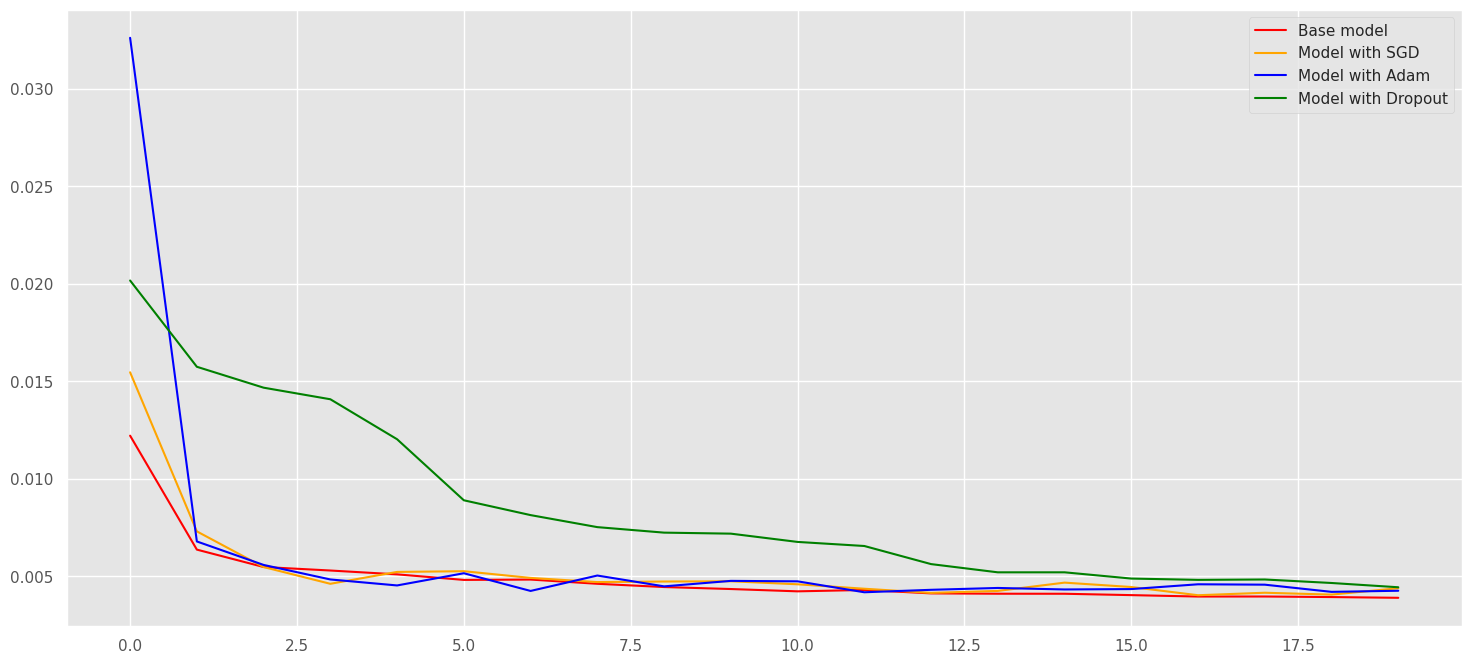

In [ ]:
loss_per_epoch_base_model = regressor.history.history['loss']
loss_per_epoch_with_sgd = S_RNN_with_sgd.history.history['loss']
loss_per_epoch_with_adam = S_RNN_with_adam.history.history['loss']
loss_per_epoch_with_dropout = S_RNN_with_dropout.history.history['loss']

plt.plot(range(len(loss_per_epoch_base_model)), loss_per_epoch_base_model, color = 'red', label="Base model")
plt.plot(range(len(loss_per_epoch_with_sgd)), loss_per_epoch_with_sgd, color = 'orange', label="Model with SGD")
plt.plot(range(len(loss_per_epoch_with_adam)), loss_per_epoch_with_adam, color = 'blue', label="Model with Adam")
plt.plot(range(len(loss_per_epoch_with_dropout)), loss_per_epoch_with_dropout, color = 'green', label="Model with Dropout")

plt.legend()
plt.show()

# 3. LSTM Model Architecture

In [ ]:
from keras.layers import Dense, Activation, Dropout
from keras.layers import LSTM
from keras.models import Sequential
base_model = Sequential()

# Adding the first LSTM layer
base_model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_Train.shape[1], 1)))

# Adding a second LSTM layer
base_model.add(LSTM(units = 50, return_sequences = True))

# Adding a fourth LSTM layer
base_model.add(LSTM(units = 50))

# Adding the output layer
base_model.add(Dense(units = 1))

# Compiling the RNN
base_model.compile(loss = 'mean_squared_error')

base_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_with_sgd = Sequential()

# Adding the first LSTM layer
model_with_sgd.add(LSTM(units = 50, return_sequences = True, input_shape = (X_Train.shape[1], 1)))

# Adding a second LSTM layer
model_with_sgd.add(LSTM(units = 50, return_sequences = True))

# Adding a fourth LSTM layer
model_with_sgd.add(LSTM(units = 50))

# Adding the output layer
model_with_sgd.add(Dense(units = 1))

# Compiling the RNN with "Adam" as an optimizer
model_with_sgd.compile(optimizer = 'SGD', loss = 'mean_squared_error')

model_with_sgd.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 60, 50)            10400     
                                                                 
 lstm_4 (LSTM)               (None, 60, 50)            20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_with_adam = Sequential()

# Adding the first LSTM layer
model_with_adam.add(LSTM(units = 50, return_sequences = True, input_shape = (X_Train.shape[1], 1)))

# Adding a second LSTM layer
model_with_adam.add(LSTM(units = 50, return_sequences = True))

# Adding a fourth LSTM layer
model_with_adam.add(LSTM(units = 50))

# Adding the output layer
model_with_adam.add(Dense(units = 1))

# Compiling the RNN with "Adam" as an optimizer
model_with_adam.compile(optimizer = 'adam', loss = 'mean_squared_error')

model_with_adam.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 60, 50)            10400     
                                                                 
 lstm_7 (LSTM)               (None, 60, 50)            20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from keras.layers import Dense, Activation, Dropout
from keras.layers import LSTM
from keras.models import Sequential
model_with_dropout = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
model_with_dropout.add(LSTM(units = 50, return_sequences = True, input_shape = (X_Train.shape[1], 1)))
model_with_dropout.add(Dropout(0.1))

# Adding a second LSTM layer and some Dropout regularisation
model_with_dropout.add(LSTM(units = 50, return_sequences = True))
model_with_dropout.add(Dropout(0.1))

# Adding a third LSTM layer and some Dropout regularisation
model_with_dropout.add(LSTM(units = 50))

# Adding the output layer
model_with_dropout.add(Dense(units = 1))

# Compiling the RNN
model_with_dropout.compile(optimizer = 'adam', loss = 'mean_squared_error')

model_with_dropout.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_10 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_11 (LSTM)              (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 5085

In [ ]:
base_model.fit(X_Train, Y_Train, epochs = 20, batch_size = 32)

Epoch 1/20
155/155 [==============================] - 22s 91ms/step - loss: 0.0205
Epoch 2/20
155/155 [==============================] - 14s 91ms/step - loss: 0.0166
Epoch 3/20
155/155 [==============================] - 15s 98ms/step - loss: 0.0157
Epoch 4/20
155/155 [==============================] - 15s 99ms/step - loss: 0.0152
Epoch 5/20
155/155 [==============================] - 17s 111ms/step - loss: 0.0147
Epoch 6/20
155/155 [==============================] - 16s 102ms/step - loss: 0.0145
Epoch 7/20
155/155 [==============================] - 15s 99ms/step - loss: 0.0142
Epoch 8/20
155/155 [==============================] - 15s 100ms/step - loss: 0.0137
Epoch 9/20
155/155 [==============================] - 17s 107ms/step - loss: 0.0132
Epoch 10/20
155/155 [==============================] - 15s 99ms/step - loss: 0.0126
Epoch 11/20
155/155 [==============================] - 14s 92ms/step - loss: 0.0118
Epoch 12/20
155/155 [==============================] - 14s 91ms/step - loss: 0.01

In [ ]:
model_with_sgd.fit(X_Train, Y_Train, epochs = 20, batch_size = 32)

Epoch 1/20
155/155 [==============================] - 21s 99ms/step - loss: 0.0331
Epoch 2/20
155/155 [==============================] - 16s 100ms/step - loss: 0.0255
Epoch 3/20
155/155 [==============================] - 15s 99ms/step - loss: 0.0241
Epoch 4/20
155/155 [==============================] - 15s 94ms/step - loss: 0.0228
Epoch 5/20
155/155 [==============================] - 14s 91ms/step - loss: 0.0215
Epoch 6/20
155/155 [==============================] - 15s 95ms/step - loss: 0.0203
Epoch 7/20
155/155 [==============================] - 15s 100ms/step - loss: 0.0192
Epoch 8/20
155/155 [==============================] - 16s 100ms/step - loss: 0.0184
Epoch 9/20
155/155 [==============================] - 15s 100ms/step - loss: 0.0179
Epoch 10/20
155/155 [==============================] - 15s 100ms/step - loss: 0.0175
Epoch 11/20
155/155 [==============================] - 15s 100ms/step - loss: 0.0173
Epoch 12/20
155/155 [==============================] - 15s 99ms/step - loss: 0.

In [ ]:
model_with_adam.fit(X_Train, Y_Train, epochs = 20, batch_size = 32)

Epoch 1/20
155/155 [==============================] - 22s 93ms/step - loss: 0.0202
Epoch 2/20
155/155 [==============================] - 15s 96ms/step - loss: 0.0156
Epoch 3/20
155/155 [==============================] - 16s 100ms/step - loss: 0.0144
Epoch 4/20
155/155 [==============================] - 16s 100ms/step - loss: 0.0137
Epoch 5/20
155/155 [==============================] - 16s 100ms/step - loss: 0.0097
Epoch 6/20
155/155 [==============================] - 15s 99ms/step - loss: 0.0067
Epoch 7/20
155/155 [==============================] - 15s 100ms/step - loss: 0.0068
Epoch 8/20
155/155 [==============================] - 15s 100ms/step - loss: 0.0061
Epoch 9/20
155/155 [==============================] - 15s 95ms/step - loss: 0.0058
Epoch 10/20
155/155 [==============================] - 15s 94ms/step - loss: 0.0051
Epoch 11/20
155/155 [==============================] - 14s 93ms/step - loss: 0.0047
Epoch 12/20
155/155 [==============================] - 16s 100ms/step - loss: 0.

In [ ]:
model_with_dropout.fit(X_Train, Y_Train, epochs = 20, batch_size = 32)

Epoch 1/20
155/155 [==============================] - 22s 101ms/step - loss: 0.0202
Epoch 2/20
155/155 [==============================] - 16s 102ms/step - loss: 0.0157
Epoch 3/20
155/155 [==============================] - 16s 102ms/step - loss: 0.0148
Epoch 4/20
155/155 [==============================] - 16s 102ms/step - loss: 0.0140
Epoch 5/20
155/155 [==============================] - 15s 99ms/step - loss: 0.0121
Epoch 6/20
155/155 [==============================] - 15s 97ms/step - loss: 0.0094
Epoch 7/20
155/155 [==============================] - 15s 96ms/step - loss: 0.0083
Epoch 8/20
155/155 [==============================] - 15s 97ms/step - loss: 0.0075
Epoch 9/20
155/155 [==============================] - 16s 101ms/step - loss: 0.0072
Epoch 10/20
155/155 [==============================] - 16s 101ms/step - loss: 0.0068
Epoch 11/20
155/155 [==============================] - 16s 101ms/step - loss: 0.0064
Epoch 12/20
155/155 [==============================] - 16s 102ms/step - loss: 

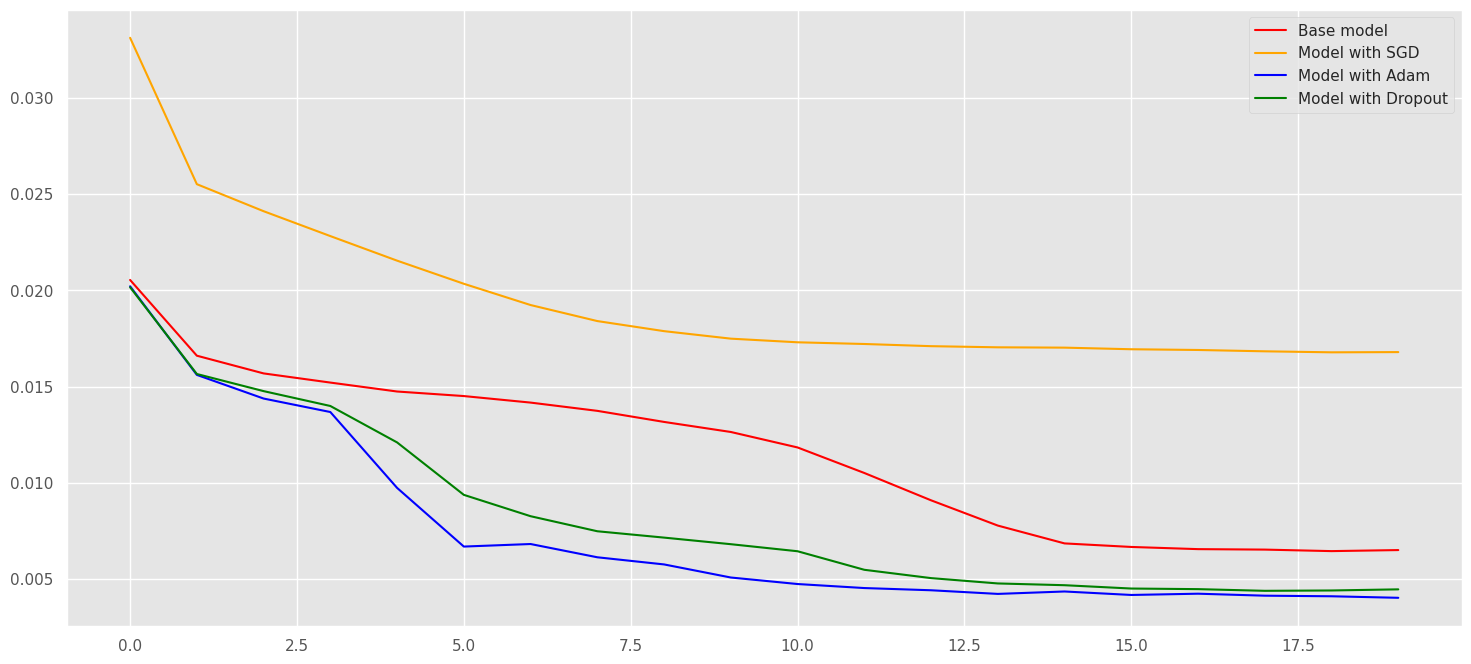

In [ ]:
loss_per_epoch_base_model = base_model.history.history['loss']
loss_per_epoch_with_sgd = model_with_sgd.history.history['loss']
loss_per_epoch_with_adam = model_with_adam.history.history['loss']
loss_per_epoch_with_dropout = model_with_dropout.history.history['loss']

plt.plot(range(len(loss_per_epoch_base_model)), loss_per_epoch_base_model, color = 'red', label="Base model")
plt.plot(range(len(loss_per_epoch_with_sgd)), loss_per_epoch_with_sgd, color = 'orange', label="Model with SGD")
plt.plot(range(len(loss_per_epoch_with_adam)), loss_per_epoch_with_adam, color = 'blue', label="Model with Adam")
plt.plot(range(len(loss_per_epoch_with_dropout)), loss_per_epoch_with_dropout, color = 'green', label="Model with Dropout")

plt.legend()
plt.show()


In [ ]:
Df_Total = pd.concat((NewDataset[["AEP_MW"]], TestData[["AEP_MW"]]), axis=0)

Df_Total.shape

(5155, 1)

In [ ]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values
inputs.shape

(160, 1)

In [ ]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values

# We need to Reshape
inputs = inputs.reshape(-1,1)

# Normalize the Dataset
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 160):
    X_test.append(inputs[i-60:i])

# Convert into Numpy Array
X_test = np.array(X_test)

# Reshape before Passing to Network
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Pass to Model
predicted_consumption = model_with_dropout.predict(X_test)

# Do inverse Transformation to get Values
predicted_consumption = sc.inverse_transform(predicted_consumption)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4/4 [==============================] - 1s 20ms/step


In [ ]:
True_MegaWatt = TestData["AEP_MW"].to_list()
Predicted_MegaWatt  = predicted_consumption
dates = TestData.index.to_list()

In [ ]:
Machine_Df = pd.DataFrame(data={
    "Date":dates,
    "TrueMegaWatt": True_MegaWatt,
    "PredictedMeagWatt":[x[0] for x in Predicted_MegaWatt ]
})

Machine_Df

,Date,TrueMegaWatt,PredictedMeagWatt
0,2018-04-26,13157.791667,13511.749023
1,2018-04-27,12964.000000,13294.410156
2,2018-04-28,12237.583333,14980.926758
3,2018-04-29,12156.791667,12907.857422
4,2018-04-30,13443.500000,13041.997070
...,...,...,...
95,2018-07-30,15368.083333,15747.252930
96,2018-07-31,15180.291667,15606.538086
97,2018-08-01,15151.166667,14575.919922
98,2018-08-02,15687.666667,15360.329102


In [ ]:
True_MegaWatt = TestData["AEP_MW"].to_list()
Predicted_MegaWatt  = [x[0] for x in Predicted_MegaWatt ]
dates = TestData.index.to_list()

# Final Energy Prediction

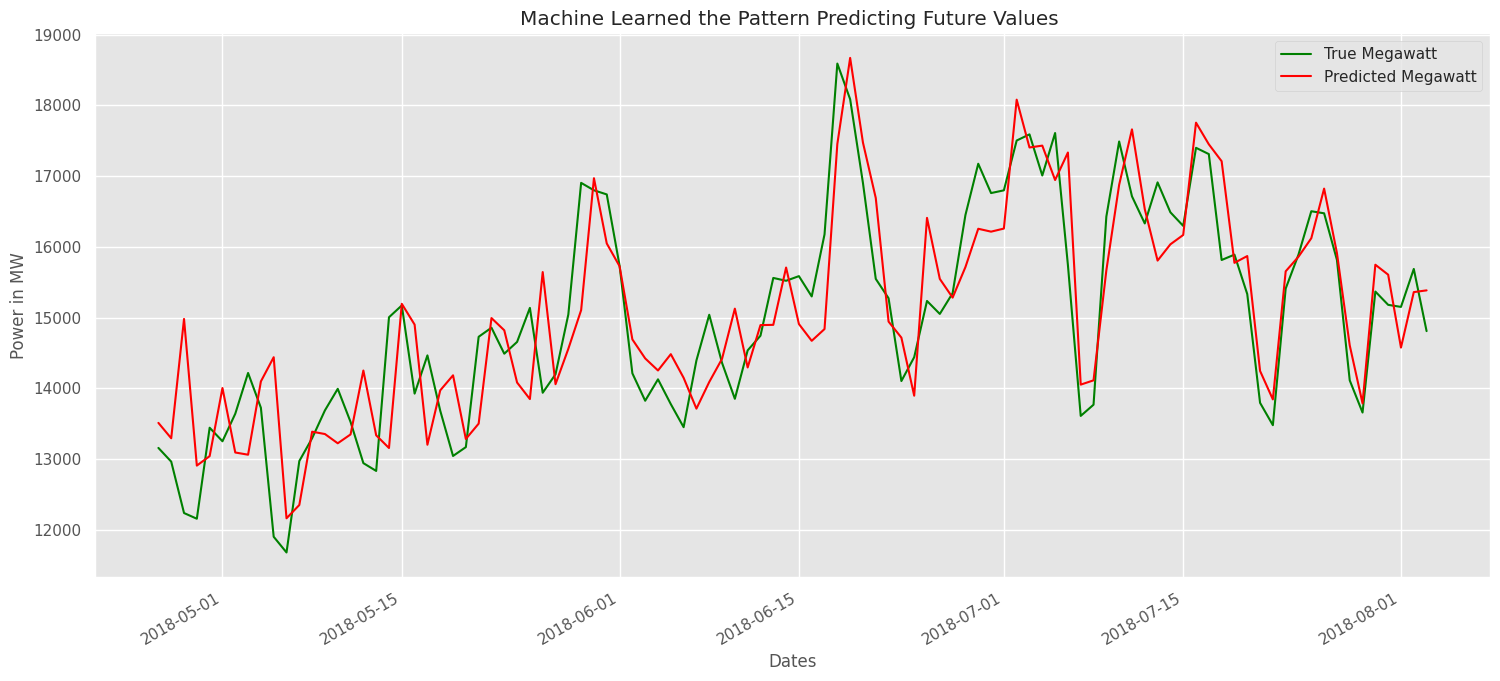

In [ ]:
fig = plt.figure()

ax1= fig.add_subplot(111)

x = dates
y = True_MegaWatt

# -------- FINAL PREDICTED OUTPUT ----------
y1 = Predicted_MegaWatt

plt.plot(x,y, color="green", label='True Megawatt')
plt.plot(x,y1, color="red", label='Predicted Megawatt')

plt.gcf().autofmt_xdate() # x-labels formatting
plt.xlabel('Dates')
plt.ylabel("Power in MW")
plt.title("Machine Learned the Pattern Predicting Future Values ")
plt.legend()